In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math

In [2]:
datafilename="insurance.db"

In [3]:
conn = sqlite3.connect(datafilename)

In [4]:
query ='SELECT \
E."Customer Identity" as c_id,\
"First Policy´s Year" as first_policy_year,\
"Brithday Year" as birthday_year,\
"Educational Degree" as ed_degree,\
"Gross Monthly Salary" as month_salary,\
"Geographic Living Area" as living_area,\
"Has Children (Y=1)" as has_children,\
"Customer Monetary Value" as customer_monetary_value,\
"Claims Rate" as claims_rate,\
"Premiums in LOB: Motor" as premium_motor,\
"Premiums in LOB: Household" as premium_house,\
"Premiums in LOB: Health" as premium_health,\
"Premiums in LOB:  Life" as premium_life,\
"Premiums in LOB: Work Compensations" as premium_work \
from Engage E \
join LOB L \
on E."Customer Identity"=L."Customer Identity"'


In [5]:
df= pd.read_sql_query(query, conn)
df = df.set_index('c_id')
df.head(5)

,first_policy_year,birthday_year,ed_degree,month_salary,living_area,has_children,customer_monetary_value,claims_rate,premium_motor,premium_house,premium_health,premium_life,premium_work
c_id,,,,,,,,,,,,,
1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [6]:
df['years_as_customer'] = 2016 - df['first_policy_year']
df = df.drop(['birthday_year', 'first_policy_year'], axis=1)

In [7]:
df.describe()

,month_salary,living_area,has_children,customer_monetary_value,claims_rate,premium_motor,premium_house,premium_health,premium_life,premium_work,years_as_customer
count,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000,10266.000000
mean,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514,24.937366
std,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572,511.267913
min,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000,-51768.000000
25%,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000,24.000000
50%,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000,30.000000
75%,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000,36.000000
max,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000,42.000000


In [8]:
df[['month_salary', 'premium_motor', 'premium_health', 'premium_life', 'premium_house', 'premium_work']][df['premium_motor']>4000]

,month_salary,premium_motor,premium_health,premium_life,premium_house,premium_work
c_id,,,,,,
5129,3763.0,4003.44,137.36,121.69,612.90,31.34
5212,4135.0,8744.61,1767.00,155.14,101.70,130.58
5294,3564.0,11604.42,1045.52,103.13,48.90,296.47
6702,2947.0,4273.49,105.13,3.00,83.90,3.89
7086,2460.0,5645.50,49.01,1.89,-25.55,1.89


In [9]:
degree = df.reset_index().groupby('ed_degree').count()
degree

,c_id,month_salary,living_area,has_children,customer_monetary_value,claims_rate,premium_motor,premium_house,premium_health,premium_life,premium_work,years_as_customer
ed_degree,,,,,,,,,,,,
1 - Basic,1272,1266,1272,1268,1272,1272,1268,1272,1267,1267,1264,1270
2 - High School,3510,3502,3510,3503,3510,3510,3503,3510,3495,3487,3492,3506
3 - BSc/MSc,4799,4779,4799,4791,4799,4799,4779,4799,4781,4734,4749,4793
4 - PhD,698,697,697,696,698,698,695,698,694,687,689,695


In [10]:
has_children = df.reset_index().groupby('has_children').count()
has_children

,c_id,ed_degree,month_salary,living_area,customer_monetary_value,claims_rate,premium_motor,premium_house,premium_health,premium_life,premium_work,years_as_customer
has_children,,,,,,,,,,,,
0.0,3013,3006,3005,3013,3013,3013,3005,3013,3000,2985,2991,3005
1.0,7262,7252,7234,7262,7262,7262,7236,7262,7232,7186,7198,7248


--Number of Years as Customer--
max: 42
min: -51768
standard deviation: 511
1/4 quantile: 24
Average: 24, Median: 30
3/4 quantile 36
---


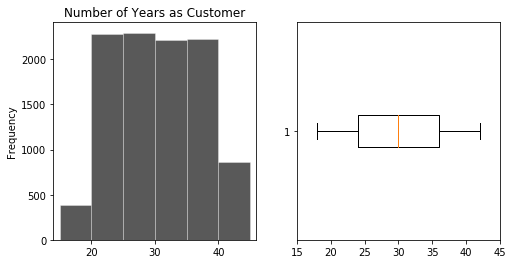

In [11]:
print('--Number of Years as Customer--')
print('max: %d' % df['years_as_customer'].max())
print('min: %d' % df['years_as_customer'].min())
print('standard deviation: %d' % df['years_as_customer'].std())
print('1/4 quantile: %d' % df['years_as_customer'].quantile(q=0.25))
print('Average: %d, Median: %d' % (df['years_as_customer'].mean(),df['years_as_customer'].median()))
print('3/4 quantile %d' % df['years_as_customer'].quantile(q=0.75))
print('---')

#df['years_as_customer'][df['years_as_customer']<0] = np.nan

fig = plt.figure(figsize=(8,4))

axes1 = plt.subplot2grid((1,2), (0,0), colspan=1)

x = [i for i in range(10, 80, 5)]
axes1=df['years_as_customer'].plot.hist(color='black', alpha=0.65, bins=x, edgecolor='white', linewidth=0.5)
axes1.set_title('Number of Years as Customer', fontsize=12);
axes1.set_xlim([14,46])
axes2 = plt.subplot2grid((1,2), (0,1), colspan=1)
axes2.boxplot(df['years_as_customer'][df['years_as_customer']<200], vert=False)
axes2.set_xticks([15, 20, 25, 30, 35, 40,45])
axes2.set_xlim([15,45])

plt.savefig('years_customer.jpeg')

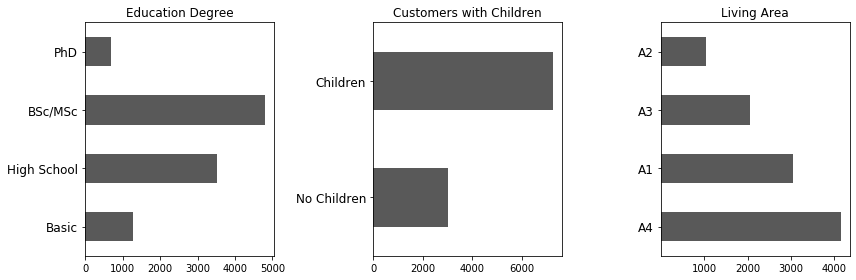

In [12]:
fig = plt.figure(figsize=(12,4))


axes1 = plt.subplot2grid((1,3), (0,0), colspan=1)
axes1=degree['c_id'].plot.barh(color='black', alpha=0.65)
axes1.set_title('Education Degree', fontsize=12)
axes1.set_yticklabels(['Basic', 'High School', 'BSc/MSc', 'PhD'], fontsize=12)
axes1.set_ylabel('')

axes2 = plt.subplot2grid((1,3), (0,1), colspan=1)
axes2 = has_children['c_id'].plot.barh(color='black', alpha=0.65)
axes2.set_title('Customers with Children', fontsize=12)
axes2.set_yticklabels(['No Children', 'Children'], fontsize=12)
axes2.set_ylabel('')

living_area=df['living_area'].value_counts()
#living_area_indexes = df['living_area'].index.get_levels_values()
living_area = pd.DataFrame(living_area)
axes3 = plt.subplot2grid((1,3), (0,2), colspan=1)

axes3 = df.living_area.value_counts().plot(kind='barh', color='black', alpha=0.65)
xticks = [i for i in range(1000, 5000, 1000)]
axes3.set_xticks(xticks)
yticks=['A4', 'A1', 'A3', 'A2']
axes3.set_yticklabels(yticks, fontsize=12)
axes3.set_title('Living Area', fontsize=12);
fig.tight_layout();

In [13]:
def exploratory_visual(df, name_variable, variable_string, limit, x1, r1, rb, ry, xb, name_plot):   
    print('--%s--\n'%variable_string)
    print('max: %.2f' % df[name_variable].max())
    print('min: %.2f' % df[name_variable].min())
    print('standard deviation: %.2f' % df[name_variable].std())
    print('1/4 quantile: %.2f' % df[name_variable].quantile(q=0.25))
    print('Average: %.2f, Median: %.2f' % (df[name_variable].mean(),df[name_variable].median()))
    print('3/4 quantile %.2f' % df[name_variable].quantile(q=0.75))
    
    mask=df['month_salary']>limit
    print('number outliers: %d' % len(df[mask]))
    
    
    
    meanlineprops=dict(linestyle='-.', color='firebrick')
    
    fig = plt.figure(figsize=(12,4))
    axes1 = plt.subplot2grid((1,2), (0,0), colspan=1)
    axes1.set_xlim(x1)
    x = [i for i in range(r1[0], r1[1], r1[2])]
    x1 = [i for i in range(rb[0], rb[1], rb[2])]
    yticks = [i for i in range(ry[0],ry[1],ry[2])]
    axes1.set_yticks(yticks)
    axes1=df[name_variable].plot.hist(color='black', alpha=0.65, bins=x, edgecolor='white', linewidth=0.5)
    axes1.set_title('Salary', fontsize=12);
    axes1.set_xticks(x1)
    
    axes2 = plt.subplot2grid((1,2), (0,1), colspan=1)
    x2 = [i for i in range(xb[0], xb[1], xb[2])]
    axes2.set_xticks(x2)
    axes2.boxplot(df[name_variable][~df[name_variable].isnull()], vert=False,
                  showmeans=True, meanline=True, meanprops=meanlineprops)
    plt.savefig(name_plot)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


--Month Salary--

max: 5021.00
min: 333.00
standard deviation: 984.66
1/4 quantile: 1706.00
Average: 2498.65, Median: 2501.50
3/4 quantile 3290.00
number outliers: 0


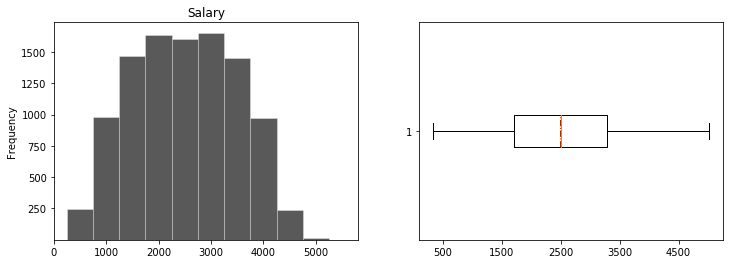

In [14]:
#set salaries higher than 30000 to be divided by 12
df['month_salary'][df['month_salary']>30000]/=12
exploratory_visual(df, 'month_salary', 'Month Salary', limit=5800, x1=(400, 5800),r1=(250, 6000, 500),
                   rb=(0, 6000, 1000), ry=(250,3000,250), xb=(500,5000,1000), name_plot='salary_plot')

In [15]:
df['customer_monetary_value'].sort_values(ascending=False).head(10)

c_id
5294    11875.89
7086     5596.84
6702     4328.50
5085     2314.21
2324     2054.07
8668     1997.60
8367     1891.04
4374     1801.45
2044     1716.00
9236     1691.43
Name: customer_monetary_value, dtype: float64

--Customer Monetary Value--
max: 11875.89
min: -165680.42
standard deviation: 1945.81
1/4 quantile: -9.44
Average: 177.89, Median: 186.87
3/4 quantile 399.78
number outliers: 2
standard deviation: 1945.81


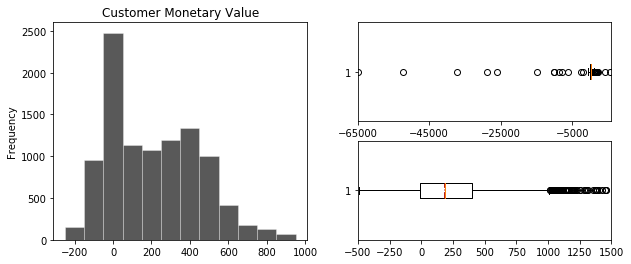

In [16]:
mask1=df['customer_monetary_value']<-100000
mask2=df['customer_monetary_value']>6000
outliers_cmv = df['customer_monetary_value'][mask1 | mask2]
meanlineprops=dict(linestyle='-.', color='firebrick')
print('--Customer Monetary Value--')
print('max: %.2f' % df['customer_monetary_value'].max())
print('min: %.2f' % df['customer_monetary_value'].min())
print('standard deviation: %.2f' % df['customer_monetary_value'].std())
print('1/4 quantile: %.2f' % df['customer_monetary_value'].quantile(q=0.25))
print('Average: %.2f, Median: %.2f' % (df['customer_monetary_value'].mean(),df['customer_monetary_value'].median()))
print('3/4 quantile %.2f' % df['customer_monetary_value'].quantile(q=0.75))
print('number outliers: %d' % outliers_cmv.count())

print('standard deviation: %.2f' % df['customer_monetary_value'].std())
fig = plt.figure(figsize=(10,4))
axes1 = plt.subplot2grid((2,2), (0,0), colspan=1, rowspan=2)
x = [i for i in range(-250, 1000, 100)]
xticks = [i for i in range(-200, 1500, 200)]
axes1.set_xticks(xticks)
axes1 = df['customer_monetary_value'].plot.hist(color='black', alpha=0.65, bins=x, edgecolor='white', linewidth=0.5)
axes1.set_title('Customer Monetary Value', fontsize=12)

axes2 = plt.subplot2grid((2 ,2), (0,1), colspan=1, rowspan=1)
axes2.boxplot(df['customer_monetary_value'][~mask1&~mask2], vert=False)
axes2.set_xlim([-65000, 6000])
axes2.set_xticks([i for i in range(-65000, 6000, 20000)])

axes2 = plt.subplot2grid((2 ,2), (1,1), colspan=1, rowspan=1)
axes2.boxplot(df['customer_monetary_value'], vert=False, showmeans=True, meanline=True, meanprops=meanlineprops)
axes2.set_xlim([-500, 1500])

plt.savefig('cmv')

In [17]:
df['claims_rate'].sort_values(ascending=False).head(20)

c_id
172      256.20
656       96.00
9649      69.00
676       63.00
708       35.00
918       32.30
52        25.36
113       15.65
136       14.80
794       13.90
759       12.60
983        9.87
952        5.60
1026       4.36
7963       4.33
8677       1.62
9955       1.55
9391       1.55
3388       1.54
10027      1.51
Name: claims_rate, dtype: float64

--Claims Rate--
max: 256.20
min: 0.00
standard deviation: 2.92
1/4 quantile: 0.39
Average: 0.74, Median: 0.72
3/4 quantile 0.98

Number of outliers: 12

Not taking into account outliers
Standard deviation: 2.54
Maximum: 256.20
Minimum: 0.00
1/4 quantile: 0.39
Average: 0.71
3/4 quantile 0.98


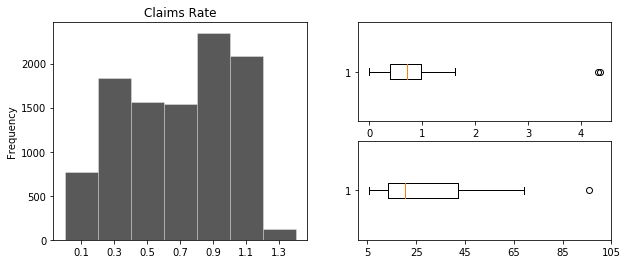

In [18]:
print('--Claims Rate--')
print('max: %.2f' % df['claims_rate'].max())
print('min: %.2f' % df['claims_rate'].min())
print('standard deviation: %.2f' % df['claims_rate'].std())
print('1/4 quantile: %.2f' % df['claims_rate'].quantile(q=0.25))
print('Average: %.2f, Median: %.2f' % (df['claims_rate'].mean(),df['claims_rate'].median()))
print('3/4 quantile %.2f' % df['claims_rate'].quantile(q=0.75))

claims_rate_outliers = df['claims_rate']>100
mask2=df['claims_rate']>5
mask=mask2&~claims_rate_outliers
print('\nNumber of outliers: %d' % df['claims_rate'][mask].count())
print('\nNot taking into account outliers')
print('Standard deviation: %.2f' % df['claims_rate'][~mask].std())
print('Maximum: %.2f' % df['claims_rate'][~mask].max())
print('Minimum: %.2f' % df['claims_rate'][~mask].min())
print('1/4 quantile: %.2f' % df['claims_rate'][~mask].quantile(q=0.25))
print('Average: %.2f' % df['claims_rate'][~mask].mean())
print('3/4 quantile %.2f' % df['claims_rate'][~mask].quantile(q=0.75))

fig = plt.figure(figsize=(10,4))
axes1 = plt.subplot2grid((2,2), (0,0), colspan=1, rowspan=2)
x = [i/10 for i in range(0,16,2)]
xticks = [i/10 for i in range(-1,16,2)]
axes1.set_xticks(xticks)
axes1 = df['claims_rate'].plot.hist(color='black', alpha=0.65, bins=x, edgecolor='white', linewidth=0.5)

axes2 = plt.subplot2grid((2,2), (0,1), colspan=1, rowspan=1)
axes2.boxplot(df['claims_rate'][~mask2], vert=False)
axes1.set_title('Claims Rate', fontsize=12)
axes3 = plt.subplot2grid((2,2), (1,1), colspan=1, rowspan=1)
axes3.boxplot(df['claims_rate'][~claims_rate_outliers&mask2], vert=False)
axes3.set_xticks([i for i in range(5,110,20)])
plt.savefig('claims_dist')

In [19]:
df['sum_premiums'] = df['premium_motor'] + df['premium_life'] + df['premium_work'] + df['premium_house'] + df['premium_health']

mask_sum = df['sum_premiums'] > df['month_salary']*12
df[['month_salary', 'sum_premiums', 'premium_life', 'premium_motor', 'premium_work', 'premium_house', 'premium_health', 'years_as_customer']][mask_sum].head(10)

,month_salary,sum_premiums,premium_life,premium_motor,premium_work,premium_house,premium_health,years_as_customer
c_id,,,,,,,,
9150,987.0,29331.32,65.68,26.34,138.25,829.05,28272.0,31.0


In [20]:
df['premium_motor'].sort_values(ascending=False).head(10)

c_id
5294    11604.42
5212     8744.61
7086     5645.50
6702     4273.49
5129     4003.44
7905     3106.62
368       585.22
88        581.33
1360      580.11
7281      578.33
Name: premium_motor, dtype: float64

--Premium Motor--
max: 11604.42
min: -4.11
standard deviation: 211.91
1/4 quantile: 190.59
Average: 300.47, Median: 298.61
3/4 quantile 408.30
number outliers: 1


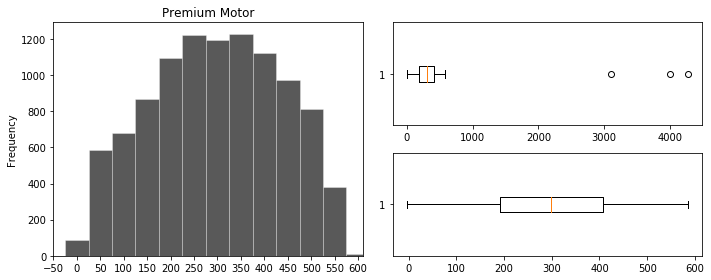

In [21]:
print('--Premium Motor--')
print('max: %.2f' % df['premium_motor'].max())
print('min: %.2f' % df['premium_motor'].min())
print('standard deviation: %.2f' % df['premium_motor'].std())
print('1/4 quantile: %.2f' % df['premium_motor'].quantile(q=0.25))
print('Average: %.2f, Median: %.2f' % (df['premium_motor'].mean(),df['premium_motor'].median()))
print('3/4 quantile %.2f' % df['premium_motor'].quantile(q=0.75))
print('number outliers: %d' % df['premium_motor'][df['premium_motor']>9000].count())

#-21.32 < x < 620.21
outliers_motor = df['premium_motor']>9000
 
fig = plt.figure(figsize=(10,4))

axes1 = plt.subplot2grid((4,2), (0,0), colspan=1, rowspan=4)
axes1.set_xlim([-20, 610])
x1 = [i for i in range(-25, 12000, 50)]
yticks1 = [i for i in range(0, 3000, 200)]
axes1.set_yticks(yticks1)
axes1=df['premium_motor'][~outliers_motor].plot.hist(color='black', alpha=0.65, bins=x1, edgecolor='white', linewidth=0.5)
axes1.set_title('Premium Motor', fontsize=12)
axes1.set_xticks([i for i in range(-50,650,50)])
axes2 = plt.subplot2grid((4,2), (0,1), colspan=1, rowspan=2)
axes2 = plt.boxplot(df['premium_motor'][df['premium_motor']<5000], vert=False)

axes2 = plt.subplot2grid((4,2), (2,1), colspan=1, rowspan=2)
axes2 = plt.boxplot(df['premium_motor'][df['premium_motor']<1000], vert=False)
fig.tight_layout()
plt.savefig('pmotor_dist')

In [22]:
df['premium_life'].sort_values(ascending=False).head()

c_id
3485    398.30
7308    365.18
2423    363.29
1302    354.40
2372    346.40
Name: premium_life, dtype: float64

--Premium Life--
max: 398.30
min: -7.00
standard deviation: 47.48
1/4 quantile: 9.89
Average: 41.86, Median: 25.56
3/4 quantile 57.79
number outliers: 4


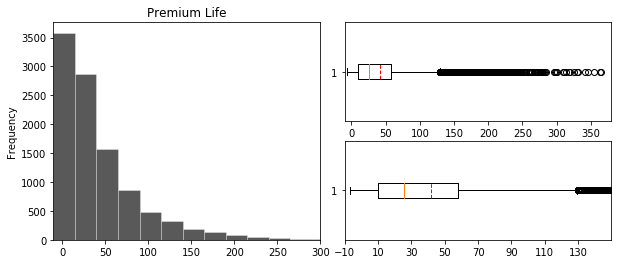

In [23]:
print('--Premium Life--')
print('max: %.2f' % df['premium_life'].max())
print('min: %.2f' % df['premium_life'].min())
print('standard deviation: %.2f' % df['premium_life'].std())
print('1/4 quantile: %.2f' % df['premium_life'].quantile(q=0.25))
print('Average: %.2f, Median: %0.2f' % (df['premium_life'].mean(),df['premium_life'].median()))
print('3/4 quantile %.2f' % df['premium_life'].quantile(q=0.75))
print('number outliers: %d' % df['premium_life'][df['premium_life']>350].count())
meanlineprops=dict(linestyle='--', color='red')
fig= plt.figure(figsize=(10,4))

x = [i for i in range(-10, 350, 25)]

axes1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=2)
axes1=df['premium_life'].plot.hist(color='black', alpha=0.65, bins=x, edgecolor='white', linewidth=0.5)
axes1.set_title('Premium Life', fontsize=12)
axes1.set_xlim([-10,300])

axes2 = plt.subplot2grid((2,4), (0,2), colspan=2)
axes2.set_xlim([-10,380])
axes2.boxplot(df['premium_life'][df['premium_life']<800], vert=False,
              showmeans=True, meanline=True, meanprops=meanlineprops)

axes3 = plt.subplot2grid((2,4), (1,2), colspan=2)
axes3.set_xlim([-10,150])
axes3.boxplot(df['premium_life'][df['premium_life']<800], vert=False,
              showmeans=True, meanline=True, meanprops=meanlineprops)
axes3.set_xticks([i for i in range(-10,150,20)])
plt.savefig('plife_dist')

In [24]:
df['premium_house'].sort_values(ascending=False).head(10)

c_id
8867    25048.80
6836     8762.80
6344     4130.70
8426     2223.75
2324     1957.60
8668     1924.25
8367     1918.15
4374     1826.45
9236     1777.55
1070     1777.55
Name: premium_house, dtype: float64

--Premium House--
max: 25048.80
min: -75.00
standard deviation: 352.60
1/4 quantile: 49.45
Average: 210.43, Median: 132.80
3/4 quantile 290.05
number outliers: 1


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


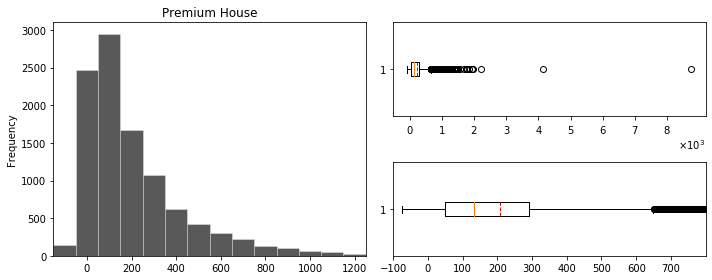

In [25]:
print('--Premium House--')
print('max: %.2f' % df['premium_house'].max())
print('min: %.2f' % df['premium_house'].min())
print('standard deviation: %.2f' % df['premium_house'].std())
print('1/4 quantile: %.2f' % df['premium_house'].quantile(q=0.25))
print('Average: %.2f, Median: %.2f' % (df['premium_house'].mean(),df['premium_house'].median()))
print('3/4 quantile %.2f' % df['premium_house'].quantile(q=0.75))

#-303.15 < x < 642.65

premium_house = df['premium_house']<9000
outliers_house = df['premium_house']>25000
print('number outliers: %d' % df['premium_house'][~premium_house].count())
df['premium_house'][outliers_house]=np.nan
fig = plt.figure(figsize=(10,4))

x = [i for i in range(-150, 2000, 100)]
axes = plt.subplot2grid((2,4), (0,0), rowspan=2, colspan=2)
axes=df['premium_house'].plot.hist(color='black', alpha=0.65, bins=x, edgecolor='white', linewidth=0.5)
axes.set_title('Premium House', fontsize=12)
axes.set_xlim([-150, 1250])

axes1 = plt.subplot2grid((2,4), (0,2), colspan=2, rowspan=1)
axes1.boxplot(df['premium_house'][premium_house], vert=False,
              showmeans=True, meanline=True, meanprops=meanlineprops)
xticks1 = [i for i in range(0, 9000, 1000)]
axes1.set_xticks(xticks1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(1,3), useMathText=True);

axes2 = plt.subplot2grid((2,4), (1,2), colspan=2, rowspan=1)
axes2.boxplot(df['premium_house'][df['premium_house']<9000], vert=False,
             showmeans=True, meanline=True, meanprops=meanlineprops)
xticks2 = [i for i in range(-100, 800, 100)]
axes2.set_xticks(xticks2)
axes2.set_xlim([-100,800])
fig.tight_layout()
plt.savefig('premium_house')

In [26]:
df['premium_work'].sort_values(ascending=False).head()

c_id
5085    1988.70
7962     930.44
1746     494.10
150      451.53
1776     417.08
Name: premium_work, dtype: float64

--Premium Work--
max: 1988.70
min: -12.00
standard deviation: 51.51
1/4 quantile: 10.67
Average: 41.28, Median: 25.67
3/4 quantile 56.79
number outliers: 1


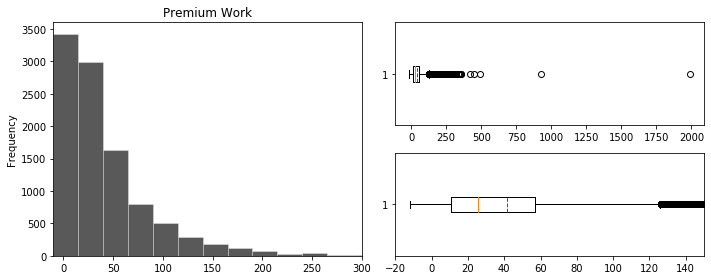

In [27]:
print('--Premium Work--')
print('max: %.2f' % df['premium_work'].max())
print('min: %.2f' % df['premium_work'].min())
print('standard deviation: %.2f' % df['premium_work'].std())
print('1/4 quantile: %.2f' % df['premium_work'].quantile(q=0.25))
print('Average: %.2f, Median: %.2f' % (df['premium_work'].mean(),df['premium_work'].median()))
print('3/4 quantile %.2f' % df['premium_work'].quantile(q=0.75))
outliers_work = df['premium_work'] > 950
print('number outliers: %d' % df['premium_work'][outliers_work].count())

#-40.84 < x < 108.3
fig = plt.figure(figsize=(10,4))

axes1 = plt.subplot2grid((4,4), (0,0), colspan=2, rowspan=4)
x = [i for i in range(-60, 400, 25)]
axes1.set_xticks([i for i in range(-50,350,50)])
axes1=df['premium_work'].plot.hist(color='black', alpha=0.65, bins=x, edgecolor='white', linewidth=0.5)
axes1.set_xlim([-10, 300])
axes1.set_title('Premium Work', fontsize=12)

axes2 = plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=2)
axes2.boxplot(df['premium_work'][df['premium_work']<2000], vert=False,
             showmeans=True, meanline=True, meanprops=meanlineprops)
axes3 = plt.subplot2grid((4,4), (2,2), colspan=2, rowspan=2)
axes3.boxplot(df['premium_work'][df['premium_work']<2000], vert=False,
             showmeans=True, meanline=True, meanprops=meanlineprops)
axes3.set_xlim([-20,150])
xticks3 = [i for i in range(-20, 150, 20)]
axes3.set_xticks(xticks3)
fig.tight_layout()
plt.savefig('pwork')

In [28]:
df['premium_health'].sort_values(ascending=False).head()

c_id
9150    28272.00
7962     7322.48
5212     1767.00
5294     1045.52
2010      442.86
Name: premium_health, dtype: float64

In [29]:
df[df['premium_health']>10000]

,ed_degree,month_salary,living_area,has_children,customer_monetary_value,claims_rate,premium_motor,premium_house,premium_health,premium_life,premium_work,years_as_customer,sum_premiums
c_id,,,,,,,,,,,,,
9150,2 - High School,987.0,3.0,1.0,804.05,0.97,26.34,829.05,28272.0,65.68,138.25,31.0,29331.32


--Premium Health--
max: 28272.00
min: -2.11
standard deviation: 296.41
1/4 quantile: 111.80
Average: 171.58, Median: 162.81
3/4 quantile 219.82
number outliers: 1


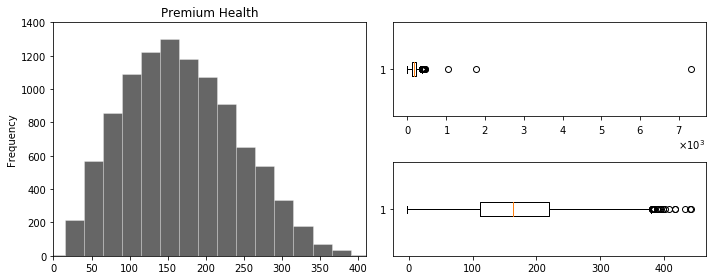

In [30]:
print('--Premium Health--')
print('max: %.2f' % df['premium_health'].max())
print('min: %.2f' % df['premium_health'].min())
print('standard deviation: %.2f' % df['premium_health'].std())
print('1/4 quantile: %.2f' % df['premium_health'].quantile(q=0.25))
print('Average: %.2f, Median: %.2f' % (df['premium_health'].mean(),df['premium_health'].median()))
print('3/4 quantile %.2f' % df['premium_health'].quantile(q=0.75))
print('number outliers: %d' % df['premium_health'][df['premium_health']>10000].count())

#-184.61 < x < 516.23
outliers_health = df['premium_health']>10000

fig, axes = plt.subplots(figsize=(10,4))

axes1 = plt.subplot2grid((4,2), (0,1), colspan=1, rowspan=2)
axes1.boxplot(df['premium_health'][df['premium_health']<10000], vert=False)
axes1.ticklabel_format(style='sci', axis='x', scilimits=(1,3), useMathText=True)

x = [i for i in range(-10, 600, 25)]
yticks = [i for i in range(0,1600,200)]
xticks = [i for i in range(0,600,50)]
axes2 = plt.subplot2grid((4,2), (0,0), colspan=1, rowspan=4)
axes2.set_yticks(yticks)
axes2.set_xticks(xticks)
axes2=df['premium_health'].plot.hist(color='black', alpha=0.60, bins=x, edgecolor='white', linewidth=0.5)
axes2.set_title('Premium Health', fontsize=12)
axes2.set_xlim([0, 410])
axes2.set_ylim([0, 1400])

axes3 = plt.subplot2grid((4,2), (2,1), colspan=1, rowspan=2)
axes3.boxplot(df['premium_health'][df['premium_health']<700], vert=False)


fig.tight_layout()
plt.savefig('phealth.jpeg')

In [34]:
df['customer_monetary_value'][df['customer_monetary_value']<-100000]=np.nan
df['premium_health'][mask_sum]=np.nan
df['claims_rate'][claims_rate_outliers]=np.nan
df['premium_motor'][outliers_motor] = np.nan
df['premium_work'][outliers_work]=np.nan
df['premium_house'][outliers_house]=np.nan

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr

In [35]:
df=df.drop(['sum_premiums'],axis=1)

In [36]:
null_table = pd.DataFrame(df.isnull().sum(), columns=['Number of Missing Values'])
null_table = null_table[null_table['Number of Missing Values']>0]
null_table.sort_values(by='Number of Missing Values', ascending = False)
null_table.sort_values(by='Number of Missing Values', ascending=False)

,Number of Missing Values
premium_life,104
premium_work,87
premium_health,44
month_salary,36
premium_motor,35
years_as_customer,30
has_children,21
ed_degree,17
living_area,1
customer_monetary_value,1


In [37]:
df.describe()

,month_salary,living_area,has_children,customer_monetary_value,claims_rate,premium_motor,premium_house,premium_health,premium_life,premium_work,years_as_customer
count,10260.000000,10295.000000,10275.000000,10295.000000,10295.000000,10261.000000,10295.000000,10252.000000,10192.000000,10209.000000,10266.000000
mean,2498.652477,2.709859,0.706764,194.003174,0.717958,299.368610,208.018528,168.839863,41.855782,41.086759,24.937366
std,984.658493,1.266291,0.455268,1055.442656,1.472898,180.158287,253.767100,104.056016,47.480632,47.773987,511.267913
min,333.000000,1.000000,0.000000,-64891.000000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000,-51768.000000
25%,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000,24.000000
50%,2501.500000,3.000000,1.000000,187.030000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000,30.000000
75%,3290.000000,4.000000,1.000000,399.805000,0.980000,408.300000,290.050000,219.235000,57.790000,56.790000,36.000000
max,5021.000000,4.000000,1.000000,11875.890000,96.000000,8744.610000,8762.800000,7322.480000,398.300000,930.440000,42.000000


In [38]:
df.to_pickle('insurance_cleaned.pkl')